In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import os

GO = pd.read_csv("../data/GeneOntology/GeneOntology_processed.csv.gz", compression="gzip")
GO = GO.groupby("Standardized_SMILES").median().reset_index()
GO

,Standardized_SMILES,substantia nigra development (GO:0021762),L-methionine salvage (GO:0071267),gamma-tubulin binding (GO:0043015),ethanol oxidation (GO:0006069),regulation of heart morphogenesis (GO:2000826),histone phosphorylation (GO:0016572),positive regulation of epidermal growth factor receptor signaling pathway (GO:0045742),negative regulation of protein modification process (GO:0031400),regulation of single stranded viral RNA replication via double stranded DNA intermediate (GO:0045091),...,transcription corepressor activity (GO:0003714),mRNA processing (GO:0006397),regulation of cell proliferation involved in heart morphogenesis (GO:2000136),transport vesicle membrane (GO:0030658),intra-S DNA damage checkpoint (GO:0031573),negative regulation of smooth muscle contraction (GO:0045986),response to molecule of bacterial origin (GO:0002237),HOPS complex (GO:0030897),positive regulation of megakaryocyte differentiation (GO:0045654),negative regulation of sister chromatid segregation (GO:0033046)
0,BrC1C(Br)C(Br)C(Br)C(Br)C1Br,4.1336,5.1166,0.7168,1.6507,0.0095,0.0709,0.0066,5.6765,0.5182,...,0.1346,-0.0000,0.0206,0.2399,-0.0000,1.5659,16.7606,0.1260,0.0861,1.8177
1,Brc1c(Br)c(Br)c2[n-]nnc2c1Br,0.3718,2.6106,0.5510,2.6602,1.8464,0.4030,0.0166,13.1935,0.0165,...,0.3294,0.3842,1.5766,0.0537,-0.0000,0.5108,7.0206,0.0123,0.0975,18.3930
2,Brc1c(NC2=[NH+]CCN2)ccc2nccnc12,0.9815,0.1742,0.2832,4.2112,0.2990,0.4009,0.0504,6.8025,0.7191,...,0.2793,0.0154,0.1193,0.1898,0.0104,0.4736,3.4417,0.0078,0.3332,0.0726
3,Brc1cc2c(cc1C1[NH2+]c3ccccc3C3C=CCC31)OCO2,1.4305,0.5075,0.0943,1.3650,0.1239,0.6040,0.4838,5.8379,0.3811,...,0.2101,0.1028,0.1962,1.5492,-0.0000,1.6063,10.4297,0.1776,1.1282,0.6334
4,Brc1ccc(-c2csc(N3CCC(c4nn[n-]n4)CC3)n2)cc1,2.3529,1.4314,0.2470,2.8158,0.0919,1.7353,0.6018,9.5083,0.1201,...,1.2263,0.0068,0.2796,4.6261,0.3330,1.8035,5.0604,0.4188,0.1897,0.0049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9127,c1nc(=NCc2ccc3c(c2)OCO3)c2cc(-c3ccoc3)ccc2[n-]1,0.5724,3.8274,0.0891,4.7815,0.3792,1.4692,0.5496,6.8667,0.1831,...,0.1194,0.0899,0.3415,1.3977,0.0428,8.4074,7.4565,0.1074,0.3005,0.2723
9128,c1nc(CC2CC[NH2+]CC2)c[n-]1,1.2152,1.0492,1.1872,1.3212,3.5049,0.0054,0.0792,4.9657,-0.0000,...,0.5735,0.5409,1.5529,0.2176,0.1075,0.3772,13.8900,0.8404,1.3803,0.0760
9129,c1nc(CCCC2CC[NH2+]CC2)c[n-]1,1.5189,0.3527,0.0451,0.5405,1.7346,0.0255,0.0547,3.2377,-0.0000,...,0.8060,-0.0000,0.8419,0.2113,0.1015,4.2827,4.9980,1.2717,0.1523,0.2625
9130,c1nc2[n-]c(=Nc3ccc(N4CCOCC4)cc3)[n-]c(=NC3CCCC...,0.9793,0.1797,0.3794,0.3847,0.3245,0.4649,1.2492,10.3566,1.1118,...,0.8681,0.1664,0.3468,1.3299,0.2869,0.4097,2.3514,0.1129,-0.0000,0.0375


In [2]:
GO.Standardized_SMILES.nunique()

9132

In [3]:
DICTrank = pd.read_csv("../data/binarised/DICTrank/DICTrank_binarised.csv.gz", compression="gzip")
DICTrank

,Trade Name,Generic/Proper Name(s),Active Ingredient(s),DICT _ Concern,Standardized_SMILES,Standardized_InChI,DICTrank
0,anzemet,dolasetron mesylate,dolasetron mesylate,most,O=C(OC1CC2CC3CC(C1)[NH+]2CC3=O)c1c[nH]c2ccccc12,InChI=1S/C19H20N2O3/c22-18-10-21-12-5-11(18)6-...,1
1,trazodone hydrochloride,trazodone hydrochloride,trazodone hydrochloride,most,O=c1n(CCC[NH+]2CCN(c3cccc(Cl)c3)CC2)nc2ccccn12,InChI=1S/C19H22ClN5O/c20-16-5-3-6-17(15-16)23-...,1
2,nuplazid,pimavanserin tartrate,pimavanserin tartrate,most,CC(C)COc1ccc(CNC(=O)[NH+](Cc2ccc(F)cc2)C2CC[NH...,InChI=1S/C25H34FN3O2/c1-19(2)18-31-24-10-6-20(...,1
3,metformin hydrochloride,metformin hydrochloride,metformin hydrochloride,most,C[NH+](C)C([NH3+])=NC(N)=[NH2+],"InChI=1S/C4H11N5/c1-9(2)4(7)8-3(5)6/h1-2H3,(H5...",1
4,flurbiprofen,flurbiprofen,flurbiprofen,most,CC(C(=O)[O-])c1ccc(-c2ccccc2)c(F)c1,InChI=1S/C15H13FO2/c1-10(15(17)18)12-7-8-13(14...,1
...,...,...,...,...,...,...,...
1015,propylthiouracil,propylthiouracil,propylthiouracil,no,CCCc1cc(=O)[n-]c(=S)[n-]1,InChI=1S/C7H10N2OS/c1-2-3-5-4-6(10)9-7(11)8-5/...,0
1016,trecator,ethionamide,ethionamide,no,CCc1cc(C([NH3+])=S)ccn1,InChI=1S/C8H10N2S/c1-2-7-5-6(8(9)11)3-4-10-7/h...,0
1017,ethosuximide,ethosuximide,ethosuximide,no,CCC1(C)CC(=O)NC1=O,InChI=1S/C7H11NO2/c1-3-7(2)4-5(9)8-6(7)10/h3-4...,0
1018,disulfiram,disulfiram,disulfiram,no,CC[NH+](CC)C(=S)SSC(=S)[NH+](CC)CC,InChI=1S/C10H20N2S4/c1-5-11(6-2)9(13)15-16-10(...,0


In [4]:
# Merge the two datasets on the 'Standardized_SMILES' column
merged_df = DICTrank.merge(GO, on='Standardized_SMILES', suffixes=('_df1', '_df2'))
merged_df

,Trade Name,Generic/Proper Name(s),Active Ingredient(s),DICT _ Concern,Standardized_SMILES,Standardized_InChI,DICTrank,substantia nigra development (GO:0021762),L-methionine salvage (GO:0071267),gamma-tubulin binding (GO:0043015),...,transcription corepressor activity (GO:0003714),mRNA processing (GO:0006397),regulation of cell proliferation involved in heart morphogenesis (GO:2000136),transport vesicle membrane (GO:0030658),intra-S DNA damage checkpoint (GO:0031573),negative regulation of smooth muscle contraction (GO:0045986),response to molecule of bacterial origin (GO:0002237),HOPS complex (GO:0030897),positive regulation of megakaryocyte differentiation (GO:0045654),negative regulation of sister chromatid segregation (GO:0033046)
0,anzemet,dolasetron mesylate,dolasetron mesylate,most,O=C(OC1CC2CC3CC(C1)[NH+]2CC3=O)c1c[nH]c2ccccc12,InChI=1S/C19H20N2O3/c22-18-10-21-12-5-11(18)6-...,1,0.80870,0.24740,0.2505,...,3.96270,0.0110,1.4327,0.2745,0.07200,2.27660,11.4622,0.0569,1.64500,-0.00000
1,trazodone hydrochloride,trazodone hydrochloride,trazodone hydrochloride,most,O=c1n(CCC[NH+]2CCN(c3cccc(Cl)c3)CC2)nc2ccccn12,InChI=1S/C19H22ClN5O/c20-16-5-3-6-17(15-16)23-...,1,1.28940,0.87920,2.9812,...,0.51800,0.0007,0.2397,0.0640,0.00140,0.40600,1.0349,0.6128,0.01410,0.11640
2,metformin hydrochloride,metformin hydrochloride,metformin hydrochloride,most,C[NH+](C)C([NH3+])=NC(N)=[NH2+],"InChI=1S/C4H11N5/c1-9(2)4(7)8-3(5)6/h1-2H3,(H5...",1,3.13390,12.30220,0.2732,...,3.62890,0.0002,0.0214,0.0734,0.39440,0.04210,19.5185,0.2100,0.12910,0.69890
3,flurbiprofen,flurbiprofen,flurbiprofen,most,CC(C(=O)[O-])c1ccc(-c2ccccc2)c(F)c1,InChI=1S/C15H13FO2/c1-10(15(17)18)12-7-8-13(14...,1,3.20480,0.14950,0.2657,...,1.47410,1.3099,0.6076,0.2114,0.01470,1.63780,5.6496,0.0696,0.13080,0.05070
4,ketoprofen,ketoprofen,ketoprofen,most,CC(C(=O)[O-])c1cccc(C(=O)c2ccccc2)c1,InChI=1S/C16H14O3/c1-11(16(18)19)13-8-5-9-14(1...,1,1.27815,0.05325,0.2288,...,1.04915,0.0003,2.4430,3.9046,0.22795,0.64535,4.7043,0.0141,0.08595,0.66045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,propylthiouracil,propylthiouracil,propylthiouracil,no,CCCc1cc(=O)[n-]c(=S)[n-]1,InChI=1S/C7H10N2OS/c1-2-3-5-4-6(10)9-7(11)8-5/...,0,0.11780,0.03060,0.2438,...,0.62760,-0.0000,0.2973,3.2521,0.11570,6.60110,6.6852,0.2086,0.29510,0.58180
546,trecator,ethionamide,ethionamide,no,CCc1cc(C([NH3+])=S)ccn1,InChI=1S/C8H10N2S/c1-2-7-5-6(8(9)11)3-4-10-7/h...,0,5.65790,0.13150,0.1980,...,0.79300,-0.0000,0.2003,0.0007,0.08360,9.20380,13.4086,0.0215,0.49960,1.28520
547,ethosuximide,ethosuximide,ethosuximide,no,CCC1(C)CC(=O)NC1=O,InChI=1S/C7H11NO2/c1-3-7(2)4-5(9)8-6(7)10/h3-4...,0,1.40790,2.46690,1.0663,...,0.92990,0.0000,3.7034,0.1928,0.03180,0.83740,1.5424,0.0058,0.00400,0.01490
548,disulfiram,disulfiram,disulfiram,no,CC[NH+](CC)C(=S)SSC(=S)[NH+](CC)CC,InChI=1S/C10H20N2S4/c1-5-11(6-2)9(13)15-16-10(...,0,1.03510,0.02950,0.5907,...,1.16640,0.0001,0.8553,0.0552,0.17480,0.54080,1.5858,0.0001,1.16980,0.01580


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, mannwhitneyu, kruskal



# Set a colorblind-friendly palette
colors = sns.color_palette("colorblind")
results = []

for label in GO.columns[1:]:
    
    # 1. Visualization

    # Set a colorblind-friendly palette
    colors = sns.color_palette("colorblind")
    # Create a bar plot
    #plt.figure(figsize=(4, 4), dpi=100)
    #sns.set(style="white")  # Set the style

    #ax = sns.barplot(x="DICT _ Concern", y=label, data=df, ci=None, palette=colors)

    # Set labels and title
    print(f'Proportion of {label}')
    #ax.set_ylabel(f'Proportion of {label}', fontsize=12)
    #ax.set_xlabel('DICT_class', fontsize=12)
    #ax.set_title(f'Proportion of {label} across DICT_class', fontsize=14)

    # Remove box line, set y-axis on the left
    #ax.spines['top'].set_visible(False)
    #ax.spines['right'].set_visible(False)
    #ax.spines['left'].set_position(('outward', 10))
    #ax.yaxis.set_ticks_position('left')

    #plt.show()


    # Perform the Kruskal-Wallis test
    group1 = merged_df[merged_df["DICT _ Concern"] == 'most'][label]
    group2 = merged_df[merged_df["DICT _ Concern"] == 'less'][label]
    group3 = merged_df[merged_df["DICT _ Concern"] == 'no'][label]
        
    try:
        h, p = kruskal(group1, group2, group3)
    except:
        continue
        
    results.append({
            'Label': label,
            'Statistic value': h,
            'P value': p,
            'Test': 'Kruskal-Wallis'
        })

results_df = pd.DataFrame(results)
results_df


Proportion of substantia nigra development (GO:0021762)
Proportion of L-methionine salvage (GO:0071267)
Proportion of gamma-tubulin binding (GO:0043015)
Proportion of ethanol oxidation (GO:0006069)
Proportion of regulation of heart morphogenesis (GO:2000826)
Proportion of histone phosphorylation (GO:0016572)
Proportion of positive regulation of epidermal growth factor receptor signaling pathway (GO:0045742)
Proportion of negative regulation of protein modification process (GO:0031400)
Proportion of regulation of single stranded viral RNA replication via double stranded DNA intermediate (GO:0045091)
Proportion of 5'-3' exonuclease activity (GO:0008409)
Proportion of determination of adult lifespan (GO:0008340)
Proportion of amyloid precursor protein metabolic process (GO:0042982)
Proportion of nucleoside-triphosphatase regulator activity (GO:0060589)
Proportion of regulation of JNK cascade (GO:0046328)
Proportion of negative regulation of cell cycle arrest (GO:0071157)
Proportion of def

Proportion of protein kinase A catalytic subunit binding (GO:0034236)
Proportion of erythrose 4-phosphate/phosphoenolpyruvate family amino acid catabolic process (GO:1902222)
Proportion of regulation of RNA stability (GO:0043487)
Proportion of regulated secretory pathway (GO:0045055)
Proportion of protein monoubiquitination (GO:0006513)
Proportion of single fertilization (GO:0007338)
Proportion of purine nucleoside biosynthetic process (GO:0042451)
Proportion of protein localization to cilium (GO:0061512)
Proportion of regulation of tissue remodeling (GO:0034103)
Proportion of cerebral cortex radially oriented cell migration (GO:0021799)
Proportion of dopaminergic neuron differentiation (GO:0071542)
Proportion of clathrin-coated vesicle membrane (GO:0030665)
Proportion of cytokine production involved in immune response (GO:0002367)
Proportion of phosphatidylinositol-4-phosphate binding (GO:0070273)
Proportion of ATP-dependent RNA helicase activity (GO:0004004)
Proportion of phasic smoo

Proportion of activation of JUN kinase activity (GO:0007257)
Proportion of glycogen biosynthetic process (GO:0005978)
Proportion of regulation of transcription involved in cell fate commitment (GO:0060850)
Proportion of proton-transporting ATPase activity, rotational mechanism (GO:0046961)
Proportion of palmitoyl-CoA hydrolase activity (GO:0016290)
Proportion of toll-like receptor 2 signaling pathway (GO:0034134)
Proportion of proteoglycan metabolic process (GO:0006029)
Proportion of response to amino acid (GO:0043200)
Proportion of negative regulation of microtubule polymerization (GO:0031115)
Proportion of regulation of inclusion body assembly (GO:0090083)
Proportion of adenine nucleotide transport (GO:0051503)
Proportion of nucleotide biosynthetic process (GO:0009165)
Proportion of cardiac muscle cell action potential (GO:0086001)
Proportion of positive regulation of small GTPase mediated signal transduction (GO:0051057)
Proportion of embryonic process involved in female pregnancy (

Proportion of fibrinolysis (GO:0042730)
Proportion of gastrulation (GO:0007369)
Proportion of actin-dependent ATPase activity (GO:0030898)
Proportion of nuclear envelope disassembly (GO:0051081)
Proportion of carbon-sulfur lyase activity (GO:0016846)
Proportion of ionotropic glutamate receptor activity (GO:0004970)
Proportion of positive regulation of glucose transport (GO:0010828)
Proportion of negative regulation of calcium ion-dependent exocytosis (GO:0045955)
Proportion of O-glycan processing (GO:0016266)
Proportion of activation of cysteine-type endopeptidase activity involved in apoptotic process (GO:0006919)
Proportion of delayed rectifier potassium channel activity (GO:0005251)
Proportion of neuropeptide receptor activity (GO:0008188)
Proportion of methyltransferase activity (GO:0008168)
Proportion of regulation of alpha-beta T cell differentiation (GO:0046637)
Proportion of regulation of phospholipase A2 activity (GO:0032429)
Proportion of negative regulation of hematopoietic 

Proportion of phosphatase activity (GO:0016791)
Proportion of taste receptor activity (GO:0008527)
Proportion of cadherin binding (GO:0045296)
Proportion of tumor necrosis factor receptor superfamily binding (GO:0032813)
Proportion of alpha-catenin binding (GO:0045294)
Proportion of RNA polymerase II distal enhancer sequence-specific DNA binding transcription factor activity (GO:0003705)
Proportion of cellular response to ketone (GO:1901655)
Proportion of granulocyte activation (GO:0036230)
Proportion of acylglycerol homeostasis (GO:0055090)
Proportion of negative regulation of DNA damage response, signal transduction by p53 class mediator (GO:0043518)
Proportion of tachykinin receptor signaling pathway (GO:0007217)
Proportion of retrograde transport, vesicle recycling within Golgi (GO:0000301)
Proportion of positive regulation of systemic arterial blood pressure (GO:0003084)
Proportion of stress-activated MAPK cascade (GO:0051403)
Proportion of growth (GO:0040007)
Proportion of lipid 

Proportion of clathrin coat (GO:0030118)
Proportion of developmental programmed cell death (GO:0010623)
Proportion of signal transduction involved in mitotic cell cycle checkpoint (GO:0072413)
Proportion of STAGA complex (GO:0030914)
Proportion of lymphocyte chemotaxis (GO:0048247)
Proportion of negative regulation of neurogenesis (GO:0050768)
Proportion of cell-cell recognition (GO:0009988)
Proportion of long-chain fatty acid binding (GO:0036041)
Proportion of organelle transport along microtubule (GO:0072384)
Proportion of negative regulation of peptidyl-tyrosine phosphorylation (GO:0050732)
Proportion of coenzyme A metabolic process (GO:0015936)
Proportion of response to nitric oxide (GO:0071731)
Proportion of purine nucleoside bisphosphate metabolic process (GO:0034032)
Proportion of rRNA processing (GO:0006364)
Proportion of cofactor transporter activity (GO:0051184)
Proportion of negative regulation of microtubule polymerization or depolymerization (GO:0031111)
Proportion of neur

Proportion of motor activity (GO:0003774)
Proportion of mitotic cell cycle (GO:0000278)
Proportion of GMP metabolic process (GO:0046037)
Proportion of RNA polymerase activity (GO:0034062)
Proportion of regulation of vesicle-mediated transport (GO:0060627)
Proportion of peptidyl-threonine modification (GO:0018210)
Proportion of cellular zinc ion homeostasis (GO:0006882)
Proportion of positive regulation of protein autophosphorylation (GO:0031954)
Proportion of response to glucagon (GO:0033762)
Proportion of cellular response to superoxide (GO:0071451)
Proportion of monooxygenase activity (GO:0004497)
Proportion of negative regulation of catabolic process (GO:0009895)
Proportion of histone H4-K5 acetylation (GO:0043981)
Proportion of integral component of plasma membrane (GO:0005887)
Proportion of AMP metabolic process (GO:0046033)
Proportion of cellular response to oxygen radical (GO:0071450)
Proportion of transcriptionally active chromatin (GO:0035327)
Proportion of circadian rhythm (G

Proportion of negative regulation of DNA repair (GO:0045738)
Proportion of 1-phosphatidylinositol binding (GO:0005545)
Proportion of epithelial structure maintenance (GO:0010669)
Proportion of positive regulation of receptor activity (GO:2000273)
Proportion of epoxygenase P450 pathway (GO:0019373)
Proportion of oligosaccharyltransferase complex (GO:0008250)
Proportion of regulation of blood vessel endothelial cell migration (GO:0043535)
Proportion of cholesterol transporter activity (GO:0017127)
Proportion of regulation of Rac GTPase activity (GO:0032314)
Proportion of transcription elongation from RNA polymerase III promoter (GO:0006385)
Proportion of regulation of sister chromatid cohesion (GO:0007063)
Proportion of cleavage furrow (GO:0032154)
Proportion of response to gonadotropin (GO:0034698)
Proportion of intestinal absorption (GO:0050892)
Proportion of phosphatidylinositol phosphate kinase activity (GO:0016307)
Proportion of cellular glucuronidation (GO:0052695)
Proportion of re

Proportion of macroautophagy (GO:0016236)
Proportion of negative regulation of epidermal growth factor receptor signaling pathway (GO:0042059)
Proportion of nucleobase-containing small molecule interconversion (GO:0015949)
Proportion of inclusion body (GO:0016234)
Proportion of aldehyde dehydrogenase (NAD) activity (GO:0004029)
Proportion of acidic amino acid transport (GO:0015800)
Proportion of cellular carbohydrate biosynthetic process (GO:0034637)
Proportion of replication fork (GO:0005657)
Proportion of brain morphogenesis (GO:0048854)
Proportion of protein import into nucleus (GO:0006606)
Proportion of protein alkylation (GO:0008213)
Proportion of pyrimidine ribonucleoside triphosphate metabolic process (GO:0009208)
Proportion of ubiquitin-dependent protein catabolic process via the multivesicular body sorting pathway (GO:0043162)
Proportion of demethylation (GO:0070988)
Proportion of meiotic cell cycle (GO:0051321)
Proportion of organelle localization (GO:0051640)
Proportion of i

Proportion of quinone binding (GO:0048038)
Proportion of negative regulation of binding (GO:0051100)
Proportion of dendrite membrane (GO:0032590)
Proportion of regulation of transcription from RNA polymerase II promoter in response to stress (GO:0043618)
Proportion of mitochondrial respiratory chain complex III (GO:0005750)
Proportion of negative regulation of MAPK cascade (GO:0043409)
Proportion of positive regulation of nuclease activity (GO:0032075)
Proportion of apicolateral plasma membrane (GO:0016327)
Proportion of response to ammonium ion (GO:0060359)
Proportion of axonal growth cone (GO:0044295)
Proportion of negative regulation of oligodendrocyte differentiation (GO:0048715)
Proportion of cornified envelope (GO:0001533)
Proportion of organic acid:sodium symporter activity (GO:0005343)
Proportion of positive regulation of cytoskeleton organization (GO:0051495)
Proportion of negative regulation of striated muscle cell apoptotic process (GO:0010664)
Proportion of leukocyte chemot

Proportion of purine ribonucleoside monophosphate catabolic process (GO:0009169)
Proportion of negative regulation of granulocyte differentiation (GO:0030853)
Proportion of positive regulation of G2/M transition of mitotic cell cycle (GO:0010971)
Proportion of epithelial cell differentiation involved in prostate gland development (GO:0060742)
Proportion of growth hormone receptor signaling pathway (GO:0060396)
Proportion of hydrolase activity, acting on carbon-nitrogen (but not peptide) bonds, in linear amides (GO:0016811)
Proportion of channel activity (GO:0015267)
Proportion of protein-DNA complex subunit organization (GO:0071824)
Proportion of metal cluster binding (GO:0051540)
Proportion of positive regulation of NF-kappaB import into nucleus (GO:0042346)
Proportion of chromosome segregation (GO:0007059)
Proportion of gene silencing (GO:0016458)
Proportion of monocyte differentiation (GO:0030224)
Proportion of proline-rich region binding (GO:0070064)
Proportion of pericardium devel

Proportion of movement in environment of other organism involved in symbiotic interaction (GO:0052192)
Proportion of negative regulation of myotube differentiation (GO:0010832)
Proportion of CatSper complex (GO:0036128)
Proportion of positive regulation of membrane protein ectodomain proteolysis (GO:0051044)
Proportion of negative regulation of phosphorus metabolic process (GO:0010563)
Proportion of positive regulation of macrophage activation (GO:0043032)
Proportion of high-density lipoprotein particle (GO:0034364)
Proportion of dendrite cytoplasm (GO:0032839)
Proportion of G-protein coupled receptor internalization (GO:0002031)
Proportion of retinoic acid metabolic process (GO:0042573)
Proportion of cholesterol binding (GO:0015485)
Proportion of AT DNA binding (GO:0003680)
Proportion of glycogen catabolic process (GO:0005980)
Proportion of four-way junction DNA binding (GO:0000400)
Proportion of cyclin-dependent protein serine/threonine kinase activity (GO:0004693)
Proportion of regu

Proportion of adaptive immune response based on somatic recombination of immune receptors built from immunoglobulin superfamily domains (GO:0002460)
Proportion of positive regulation of protein sumoylation (GO:0033235)
Proportion of myosin binding (GO:0017022)
Proportion of cellular cation homeostasis (GO:0030003)
Proportion of negative regulation of endopeptidase activity (GO:0010951)
Proportion of regulation of oxidative stress-induced neuron death (GO:1903203)
Proportion of alpha-mannosidase activity (GO:0004559)
Proportion of regulation of sister chromatid segregation (GO:0033045)
Proportion of blood vessel morphogenesis (GO:0048514)
Proportion of male meiosis I (GO:0007141)
Proportion of organellar small ribosomal subunit (GO:0000314)
Proportion of ganglion development (GO:0061548)
Proportion of regulation of protein import into nucleus, translocation (GO:0033158)
Proportion of angiogenesis involved in wound healing (GO:0060055)
Proportion of positive regulation of receptor recycl

Proportion of integral component of nuclear inner membrane (GO:0005639)
Proportion of purine deoxyribonucleotide catabolic process (GO:0009155)
Proportion of detection of calcium ion (GO:0005513)
Proportion of phospholipase C-activating dopamine receptor signaling pathway (GO:0060158)
Proportion of E-box binding (GO:0070888)
Proportion of establishment of chromosome localization (GO:0051303)
Proportion of regulation of membrane potential (GO:0042391)
Proportion of regulation of peroxisome proliferator activated receptor signaling pathway (GO:0035358)
Proportion of positive regulation of epithelial cell migration (GO:0010634)
Proportion of co-SMAD binding (GO:0070410)
Proportion of cellular response to light stimulus (GO:0071482)
Proportion of regulation of nuclease activity (GO:0032069)
Proportion of regulation of type I interferon production (GO:0032479)
Proportion of response to exogenous dsRNA (GO:0043330)
Proportion of serotonin receptor signaling pathway (GO:0007210)
Proportion of

Proportion of regulation of NIK/NF-kappaB signaling (GO:1901222)
Proportion of metallo-sulfur cluster assembly (GO:0031163)
Proportion of regulation of phosphatidylinositol 3-kinase signaling (GO:0014066)
Proportion of phosphotyrosine binding (GO:0001784)
Proportion of regulation of excretion (GO:0044062)
Proportion of histone acetyltransferase activity (H4-K8 specific) (GO:0043996)
Proportion of regulation of inflammatory response (GO:0050727)
Proportion of negative regulation of cytoskeleton organization (GO:0051494)
Proportion of regulation of systemic arterial blood pressure by hormone (GO:0001990)
Proportion of regulation of phospholipid biosynthetic process (GO:0071071)
Proportion of positive regulation of heart rate (GO:0010460)
Proportion of macrophage differentiation (GO:0030225)
Proportion of movement in host environment (GO:0052126)
Proportion of transmembrane receptor protein phosphatase activity (GO:0019198)
Proportion of phosphatidylcholine biosynthetic process (GO:000665

Proportion of death-inducing signaling complex (GO:0031264)
Proportion of BH domain binding (GO:0051400)
Proportion of response to isoquinoline alkaloid (GO:0014072)
Proportion of leukocyte migration involved in inflammatory response (GO:0002523)
Proportion of positive regulation of type I interferon production (GO:0032481)
Proportion of I-SMAD binding (GO:0070411)
Proportion of long-chain fatty acid-CoA ligase activity (GO:0004467)
Proportion of deoxyribonucleotide catabolic process (GO:0009264)
Proportion of regulation of T cell chemotaxis (GO:0010819)
Proportion of glial cell projection (GO:0097386)
Proportion of regulation of protein activation cascade (GO:2000257)
Proportion of peptide biosynthetic process (GO:0043043)
Proportion of steroid metabolic process (GO:0008202)
Proportion of immunological synapse (GO:0001772)
Proportion of alpha-amino acid catabolic process (GO:1901606)
Proportion of regulation of DNA metabolic process (GO:0051052)
Proportion of organelle envelope (GO:00

Proportion of atrioventricular valve morphogenesis (GO:0003181)
Proportion of DNA replication-independent nucleosome organization (GO:0034724)
Proportion of dephosphorylation (GO:0016311)
Proportion of behavioral response to ethanol (GO:0048149)
Proportion of polyol biosynthetic process (GO:0046173)
Proportion of response to ischemia (GO:0002931)
Proportion of regulation of axon extension involved in axon guidance (GO:0048841)
Proportion of actin filament depolymerization (GO:0030042)
Proportion of alpha-linolenic acid metabolic process (GO:0036109)
Proportion of oxidoreductase activity, acting on paired donors, with incorporation or reduction of molecular oxygen (GO:0016705)
Proportion of 3'-UTR-mediated mRNA stabilization (GO:0070935)
Proportion of somatic diversification of immune receptors via germline recombination within a single locus (GO:0002562)
Proportion of regulation of lipoprotein lipase activity (GO:0051004)
Proportion of regulation of defense response to virus by host (G

Proportion of response to inactivity (GO:0014854)
Proportion of glycosphingolipid binding (GO:0043208)
Proportion of regulation of synaptic transmission, GABAergic (GO:0032228)
Proportion of cellular component maintenance (GO:0043954)
Proportion of positive regulation of MAPK cascade (GO:0043410)
Proportion of omega peptidase activity (GO:0008242)
Proportion of regulation of cholesterol efflux (GO:0010874)
Proportion of positive regulation of cardiac muscle hypertrophy (GO:0010613)
Proportion of stress fiber assembly (GO:0043149)
Proportion of signal transduction involved in DNA damage checkpoint (GO:0072422)
Proportion of tissue remodeling (GO:0048771)
Proportion of embryonic camera-type eye development (GO:0031076)
Proportion of heterotrimeric G-protein complex (GO:0005834)
Proportion of negative regulation of calcium ion transport into cytosol (GO:0010523)
Proportion of pseudouridine synthesis (GO:0001522)
Proportion of one-carbon compound transport (GO:0019755)
Proportion of seroto

Proportion of regulation of interleukin-4 production (GO:0032673)
Proportion of Rho protein signal transduction (GO:0007266)
Proportion of regulation of cytokine production involved in immune response (GO:0002718)
Proportion of cytidine deaminase activity (GO:0004126)
Proportion of central nervous system development (GO:0007417)
Proportion of regulation of vitamin metabolic process (GO:0030656)
Proportion of focal adhesion assembly (GO:0048041)
Proportion of neuron fate determination (GO:0048664)
Proportion of outflow tract septum morphogenesis (GO:0003148)
Proportion of secretory granule organization (GO:0033363)
Proportion of positive regulation of BMP signaling pathway (GO:0030513)
Proportion of FAD binding (GO:0071949)
Proportion of small ribosomal subunit (GO:0015935)
Proportion of oxidoreductase activity, acting on the CH-CH group of donors, NAD or NADP as acceptor (GO:0016628)
Proportion of ventricular system development (GO:0021591)
Proportion of regulation of neuron apoptotic 

Proportion of sterol metabolic process (GO:0016125)
Proportion of positive regulation of regulated secretory pathway (GO:1903307)
Proportion of receptor signaling protein activity (GO:0005057)
Proportion of mitochondrial respiratory chain complex assembly (GO:0033108)
Proportion of cytoplasmic dynein complex (GO:0005868)
Proportion of patterning of blood vessels (GO:0001569)
Proportion of negative regulation of cyclase activity (GO:0031280)
Proportion of positive regulation of interleukin-17 production (GO:0032740)
Proportion of phospholipid efflux (GO:0033700)
Proportion of long-chain fatty acid biosynthetic process (GO:0042759)
Proportion of structure-specific DNA binding (GO:0043566)
Proportion of structural constituent of ribosome (GO:0003735)
Proportion of nuclear membrane (GO:0031965)
Proportion of cellular response to hormone stimulus (GO:0032870)
Proportion of adenylate cyclase-activating dopamine receptor signaling pathway (GO:0007191)
Proportion of zinc ion binding (GO:000827

Proportion of cell cycle G2/M phase transition (GO:0044839)
Proportion of stress granule assembly (GO:0034063)
Proportion of muscle adaptation (GO:0043500)
Proportion of primary alcohol metabolic process (GO:0034308)
Proportion of deoxyribose phosphate biosynthetic process (GO:0046385)
Proportion of negative regulation of cell size (GO:0045792)
Proportion of phosphatidylinositol biosynthetic process (GO:0006661)
Proportion of modification by symbiont of host morphology or physiology (GO:0044003)
Proportion of negative regulation of intrinsic apoptotic signaling pathway by p53 class mediator (GO:1902254)
Proportion of multi-organism reproductive behavior (GO:0044705)
Proportion of vascular process in circulatory system (GO:0003018)
Proportion of camera-type eye morphogenesis (GO:0048593)
Proportion of deoxyribonuclease activity (GO:0004536)
Proportion of mucosal-associated lymphoid tissue development (GO:0048537)
Proportion of positive regulation of lymphocyte mediated immunity (GO:0002

Proportion of mRNA modification (GO:0016556)
Proportion of type I interferon signaling pathway (GO:0060337)
Proportion of response to leptin (GO:0044321)
Proportion of protein insertion into membrane (GO:0051205)
Proportion of exodeoxyribonuclease activity, producing 5'-phosphomonoesters (GO:0016895)
Proportion of T-tubule (GO:0030315)
Proportion of tube formation (GO:0035148)
Proportion of purine NTP-dependent helicase activity (GO:0070035)
Proportion of negative regulation of DNA biosynthetic process (GO:2000279)
Proportion of stress-activated protein kinase signaling cascade (GO:0031098)
Proportion of negative regulation of necrotic cell death (GO:0060547)
Proportion of pronucleus (GO:0045120)
Proportion of adrenergic receptor binding (GO:0031690)
Proportion of regulation of protein sumoylation (GO:0033233)
Proportion of cholesterol biosynthetic process (GO:0006695)
Proportion of endocytic vesicle lumen (GO:0071682)
Proportion of negative regulation of telomerase activity (GO:005197

Proportion of divalent metal ion transport (GO:0070838)
Proportion of regulation of prostaglandin secretion (GO:0032306)
Proportion of regulation of mitochondrial translation (GO:0070129)
Proportion of regulation of type B pancreatic cell apoptotic process (GO:2000674)
Proportion of positive regulation of adaptive immune response based on somatic recombination of immune receptors built from immunoglobulin superfamily domains (GO:0002824)
Proportion of negative regulation of extrinsic apoptotic signaling pathway in absence of ligand (GO:2001240)
Proportion of histone H2A ubiquitination (GO:0033522)
Proportion of positive regulation of gluconeogenesis (GO:0045722)
Proportion of Ino80 complex (GO:0031011)
Proportion of establishment of organelle localization (GO:0051656)
Proportion of regulation of peptidyl-threonine phosphorylation (GO:0010799)
Proportion of endodermal cell differentiation (GO:0035987)
Proportion of motile cilium (GO:0031514)
Proportion of TOR signaling (GO:0031929)
Prop

Proportion of sequestering of extracellular ligand from receptor (GO:0035581)
Proportion of heparan sulfate sulfotransferase activity (GO:0034483)
Proportion of regulation of protein localization to cell surface (GO:2000008)
Proportion of phosphotransferase activity, for other substituted phosphate groups (GO:0016780)
Proportion of peptide hormone binding (GO:0017046)
Proportion of side of membrane (GO:0098552)
Proportion of Fc-gamma receptor signaling pathway involved in phagocytosis (GO:0038096)
Proportion of C-terminal protein lipidation (GO:0006501)
Proportion of regulation of memory T cell differentiation (GO:0043380)
Proportion of positive regulation of cellular response to insulin stimulus (GO:1900078)
Proportion of deoxyribonucleotide metabolic process (GO:0009262)
Proportion of mismatched DNA binding (GO:0030983)
Proportion of positive regulation of organelle assembly (GO:1902117)
Proportion of signal sequence binding (GO:0005048)
Proportion of lytic vacuole (GO:0000323)
Propo

Proportion of regulation of calcium-mediated signaling (GO:0050848)
Proportion of purine nucleobase biosynthetic process (GO:0009113)
Proportion of regulation of interleukin-1 beta secretion (GO:0050706)
Proportion of negative regulation of stress fiber assembly (GO:0051497)
Proportion of glucuronate metabolic process (GO:0019585)
Proportion of positive regulation of Rap GTPase activity (GO:0032854)
Proportion of nucleobase metabolic process (GO:0009112)
Proportion of catechol-containing compound biosynthetic process (GO:0009713)
Proportion of multicellular organismal water homeostasis (GO:0050891)
Proportion of intracellular cAMP activated cation channel activity (GO:0005222)
Proportion of integrator complex (GO:0032039)
Proportion of monoubiquitinated protein deubiquitination (GO:0035520)
Proportion of DNA unwinding involved in DNA replication (GO:0006268)
Proportion of zona pellucida receptor complex (GO:0002199)
Proportion of G-protein coupled receptor signaling pathway coupled to 

Proportion of response to histamine (GO:0034776)
Proportion of regulation of protein kinase B signaling (GO:0051896)
Proportion of modulation by virus of host process (GO:0019054)
Proportion of positive regulation of actin filament polymerization (GO:0030838)
Proportion of acetylcholine receptor activity (GO:0015464)
Proportion of cilium assembly (GO:0042384)
Proportion of positive regulation of actin cytoskeleton reorganization (GO:2000251)
Proportion of response to type I interferon (GO:0034340)
Proportion of cellular response to carbohydrate stimulus (GO:0071322)
Proportion of negative regulation of cardiac muscle tissue development (GO:0055026)
Proportion of cytosolic calcium ion homeostasis (GO:0051480)
Proportion of membrane repolarization during action potential (GO:0086011)
Proportion of negative regulation of viral process (GO:0048525)
Proportion of serotonin metabolic process (GO:0042428)
Proportion of peptidyl-lysine methylation (GO:0018022)
Proportion of positive regulation

Proportion of striatum development (GO:0021756)
Proportion of isomerase activity (GO:0016853)
Proportion of response to gravity (GO:0009629)
Proportion of positive regulation of protein ubiquitination (GO:0031398)
Proportion of myosin complex (GO:0016459)
Proportion of organelle subcompartment (GO:0031984)
Proportion of peroxidase activity (GO:0004601)
Proportion of negative regulation of cellular carbohydrate metabolic process (GO:0010677)
Proportion of negative regulation of interleukin-6 production (GO:0032715)
Proportion of endoplasmic reticulum unfolded protein response (GO:0030968)
Proportion of glutathione derivative biosynthetic process (GO:1901687)
Proportion of histone methylation (GO:0016571)
Proportion of spectrin-associated cytoskeleton (GO:0014731)
Proportion of positive regulation of smooth muscle contraction (GO:0045987)
Proportion of tumor necrosis factor receptor binding (GO:0005164)
Proportion of R-SMAD binding (GO:0070412)
Proportion of glucocorticoid receptor signa

Proportion of phagocytic cup (GO:0001891)
Proportion of beta-amyloid metabolic process (GO:0050435)
Proportion of response to electrical stimulus (GO:0051602)
Proportion of cellular response to retinoic acid (GO:0071300)
Proportion of protein targeting to plasma membrane (GO:0072661)
Proportion of embryonic cranial skeleton morphogenesis (GO:0048701)
Proportion of RNA polymerase II core binding (GO:0000993)
Proportion of interaction with host (GO:0051701)
Proportion of regulation of kidney development (GO:0090183)
Proportion of regulation of cation channel activity (GO:2001257)
Proportion of occluding junction (GO:0070160)
Proportion of dicarboxylic acid transport (GO:0006835)
Proportion of response to topologically incorrect protein (GO:0035966)
Proportion of nucleotide diphosphatase activity (GO:0004551)
Proportion of response to defenses of other organism involved in symbiotic interaction (GO:0052173)
Proportion of protein kinase C binding (GO:0005080)
Proportion of regulation of cy

,Label,Statistic value,P value,Test
0,substantia nigra development (GO:0021762),0.056239,0.972272,Kruskal-Wallis
1,L-methionine salvage (GO:0071267),4.698179,0.095456,Kruskal-Wallis
2,gamma-tubulin binding (GO:0043015),4.764152,0.092359,Kruskal-Wallis
3,ethanol oxidation (GO:0006069),0.171416,0.917862,Kruskal-Wallis
4,regulation of heart morphogenesis (GO:2000826),5.300569,0.070631,Kruskal-Wallis
...,...,...,...,...
4433,negative regulation of smooth muscle contracti...,3.460422,0.177247,Kruskal-Wallis
4434,response to molecule of bacterial origin (GO:0...,0.891666,0.640291,Kruskal-Wallis
4435,HOPS complex (GO:0030897),6.061824,0.048272,Kruskal-Wallis
4436,positive regulation of megakaryocyte different...,0.541071,0.762971,Kruskal-Wallis


<Figure size 2400x1800 with 0 Axes>

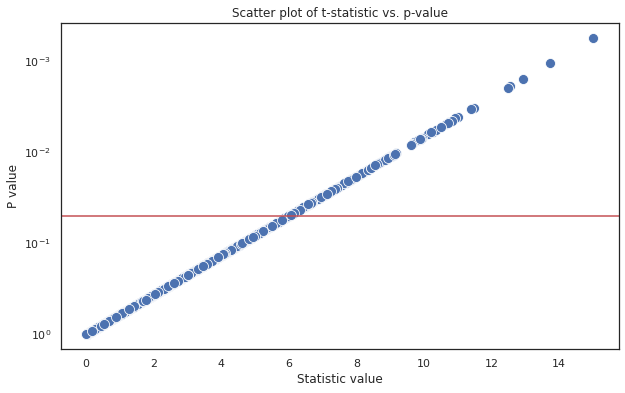

In [7]:
## Plotting

plt.figure(figsize=(8, 6), dpi=300) 
sns.set(style="white")  # Set the style
    
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x='Statistic value', y='P value', palette='tab10', s=100)
plt.yscale('log')
plt.gca().invert_yaxis()  # This line will reverse the y-axis
    
plt.title('Scatter plot of t-statistic vs. p-value')
#plt.grid(True, which="both", ls="--", c='0.65')
    
plt.axhline(y=0.05, color='r', linestyle='-')
#plt.legend()
plt.show()
           

In [8]:
results_df["Statistic value" ] = results_df["Statistic value"].astype(float)
results_df["P value" ] = results_df["P value"].astype(float)
results_df = results_df.sort_values("P value", ascending=True)
results_df

,Label,Statistic value,P value,Test
1271,transport vesicle (GO:0030133),15.001870,0.000553,Kruskal-Wallis
1899,negative regulation of potassium ion transmemb...,13.739498,0.001039,Kruskal-Wallis
1802,response to methylmercury (GO:0051597),12.922430,0.001563,Kruskal-Wallis
846,negative regulation of hormone biosynthetic pr...,12.552742,0.001880,Kruskal-Wallis
2303,cellular anion homeostasis (GO:0030002),12.482798,0.001947,Kruskal-Wallis
...,...,...,...,...
2833,establishment of spindle orientation (GO:0051294),0.001786,0.999107,Kruskal-Wallis
3420,tubulin binding (GO:0015631),0.001074,0.999463,Kruskal-Wallis
1007,regulation of nitric-oxide synthase biosynthet...,0.001069,0.999466,Kruskal-Wallis
4419,establishment of mitotic spindle orientation (...,0.000737,0.999632,Kruskal-Wallis


In [10]:
results_df[results_df["P value"]<0.05][:20]

,Label,Statistic value,P value,Test
1271,transport vesicle (GO:0030133),15.001870,0.000553,Kruskal-Wallis
1899,negative regulation of potassium ion transmemb...,13.739498,0.001039,Kruskal-Wallis
1802,response to methylmercury (GO:0051597),12.922430,0.001563,Kruskal-Wallis
846,negative regulation of hormone biosynthetic pr...,12.552742,0.001880,Kruskal-Wallis
2303,cellular anion homeostasis (GO:0030002),12.482798,0.001947,Kruskal-Wallis
1534,regulation of histone H3-K9 methylation (GO:00...,11.477034,0.003220,Kruskal-Wallis
2842,positive regulation of circadian rhythm (GO:00...,11.399333,0.003347,Kruskal-Wallis
1861,positive regulation of transforming growth fac...,10.999208,0.004088,Kruskal-Wallis
1985,norepinephrine metabolic process (GO:0042415),10.929478,0.004233,Kruskal-Wallis
2714,"regulation of CD4-positive, alpha-beta T cell ...",10.815181,0.004482,Kruskal-Wallis


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Set a colorblind-friendly palette
colors = sns.color_palette("colorblind")
results = []

for label in GO.columns[1:]:
    
    # 1. Visualization

    # Set a colorblind-friendly palette
    colors = sns.color_palette("colorblind")
    # Create a bar plot
    #plt.figure(figsize=(4, 4), dpi=100)
    #sns.set(style="white")  # Set the style

    #ax = sns.barplot(x="DICT _ Concern", y=label, data=df, ci=None, palette=colors)

    # Set labels and title
    print(f'Proportion of {label}')
    #ax.set_ylabel(f'Proportion of {label}', fontsize=12)
    #ax.set_xlabel('DICT_class', fontsize=12)
    #ax.set_title(f'Proportion of {label} across DICT_class', fontsize=14)

    # Remove box line, set y-axis on the left
    #ax.spines['top'].set_visible(False)
    #ax.spines['right'].set_visible(False)
    #ax.spines['left'].set_position(('outward', 10))
    #ax.yaxis.set_ticks_position('left')

    #plt.show()

    # 2.Tests


    group1 = merged_df[merged_df["DICTrank"] == 0][label]
    group2 = merged_df[merged_df["DICTrank"] == 1][label]
        
    # Perform the Mann-Whitney U test
    try:
        u_stat, p = mannwhitneyu(group1, group2)
    except:
        continue
    results.append({
            'Label': label,
            'Proportion': merged_df[label].mean(),
            'Test': 'Mann-Whitney U',
            'Statistic value': u_stat,
            'P value': p
        })

results_df = pd.DataFrame(results)
results_df

Proportion of substantia nigra development (GO:0021762)
Proportion of L-methionine salvage (GO:0071267)
Proportion of gamma-tubulin binding (GO:0043015)
Proportion of ethanol oxidation (GO:0006069)
Proportion of regulation of heart morphogenesis (GO:2000826)
Proportion of histone phosphorylation (GO:0016572)
Proportion of positive regulation of epidermal growth factor receptor signaling pathway (GO:0045742)
Proportion of negative regulation of protein modification process (GO:0031400)
Proportion of regulation of single stranded viral RNA replication via double stranded DNA intermediate (GO:0045091)
Proportion of 5'-3' exonuclease activity (GO:0008409)
Proportion of determination of adult lifespan (GO:0008340)
Proportion of amyloid precursor protein metabolic process (GO:0042982)
Proportion of nucleoside-triphosphatase regulator activity (GO:0060589)
Proportion of regulation of JNK cascade (GO:0046328)
Proportion of negative regulation of cell cycle arrest (GO:0071157)
Proportion of def

Proportion of dopaminergic neuron differentiation (GO:0071542)
Proportion of clathrin-coated vesicle membrane (GO:0030665)
Proportion of cytokine production involved in immune response (GO:0002367)
Proportion of phosphatidylinositol-4-phosphate binding (GO:0070273)
Proportion of ATP-dependent RNA helicase activity (GO:0004004)
Proportion of phasic smooth muscle contraction (GO:0014821)
Proportion of synaptic vesicle maturation (GO:0016188)
Proportion of fibril organization (GO:0097435)
Proportion of RNA polymerase II transcription factor binding (GO:0001085)
Proportion of regulation of action potential (GO:0098900)
Proportion of CoA-ligase activity (GO:0016405)
Proportion of phosphatase regulator activity (GO:0019208)
Proportion of phospholipase binding (GO:0043274)
Proportion of regulation of renal sodium excretion (GO:0035813)
Proportion of response to food (GO:0032094)
Proportion of negative regulation of focal adhesion assembly (GO:0051895)
Proportion of transforming growth factor 

Proportion of protein-DNA complex assembly (GO:0065004)
Proportion of regulation of complement activation (GO:0030449)
Proportion of nucleoside phosphate biosynthetic process (GO:1901293)
Proportion of sodium channel regulator activity (GO:0017080)
Proportion of positive regulation of DNA recombination (GO:0045911)
Proportion of glucose metabolic process (GO:0006006)
Proportion of regulation of phospholipase C activity (GO:1900274)
Proportion of lysosomal transport (GO:0007041)
Proportion of GDP-dissociation inhibitor activity (GO:0005092)
Proportion of protein transmembrane transport (GO:0071806)
Proportion of myeloid dendritic cell activation (GO:0001773)
Proportion of carboxylic acid binding (GO:0031406)
Proportion of inositol metabolic process (GO:0006020)
Proportion of establishment of protein localization to membrane (GO:0090150)
Proportion of pericentric heterochromatin (GO:0005721)
Proportion of histone binding (GO:0042393)
Proportion of lymphocyte proliferation (GO:0046651)
Pr

Proportion of estrogen receptor binding (GO:0030331)
Proportion of GTP-Rho binding (GO:0017049)
Proportion of neuron projection development (GO:0031175)
Proportion of negative regulation of homotypic cell-cell adhesion (GO:0034111)
Proportion of gas transport (GO:0015669)
Proportion of RNA polymerase II activating transcription factor binding (GO:0001102)
Proportion of embryonic heart tube development (GO:0035050)
Proportion of regulation of RNA export from nucleus (GO:0046831)
Proportion of segment specification (GO:0007379)
Proportion of RNA polymerase II transcription factor binding transcription factor activity involved in positive regulation of transcription (GO:0001190)
Proportion of vitamin transporter activity (GO:0051183)
Proportion of face morphogenesis (GO:0060325)
Proportion of water transport (GO:0006833)
Proportion of positive regulation of monocyte chemotaxis (GO:0090026)
Proportion of cytoplasmic membrane-bounded vesicle (GO:0016023)
Proportion of MAP kinase kinase kina

Proportion of sarcolemma (GO:0042383)
Proportion of peptidyl-serine phosphorylation (GO:0018105)
Proportion of positive regulation of interleukin-1 beta secretion (GO:0050718)
Proportion of chloride channel regulator activity (GO:0017081)
Proportion of mechanoreceptor differentiation (GO:0042490)
Proportion of renal system process involved in regulation of systemic arterial blood pressure (GO:0003071)
Proportion of cellular response to zinc ion (GO:0071294)
Proportion of basal plasma membrane (GO:0009925)
Proportion of microbody part (GO:0044438)
Proportion of regulation of glial cell differentiation (GO:0045685)
Proportion of natural killer cell mediated immunity (GO:0002228)
Proportion of cell proliferation involved in kidney development (GO:0072111)
Proportion of positive regulation of leukocyte degranulation (GO:0043302)
Proportion of positive regulation of natural killer cell differentiation (GO:0032825)
Proportion of vacuole (GO:0005773)
Proportion of nuclear chromosome part (GO:

Proportion of entry into host cell (GO:0030260)
Proportion of basal RNA polymerase II transcription machinery binding (GO:0001099)
Proportion of patched binding (GO:0005113)
Proportion of organic acid catabolic process (GO:0016054)
Proportion of mRNA catabolic process (GO:0006402)
Proportion of endodeoxyribonuclease activity, producing 3'-phosphomonoesters (GO:0016889)
Proportion of modified amino acid transport (GO:0072337)
Proportion of negative regulation of hormone biosynthetic process (GO:0032353)
Proportion of response to morphine (GO:0043278)
Proportion of mRNA cap binding complex (GO:0005845)
Proportion of somatic diversification of immunoglobulins (GO:0016445)
Proportion of granulocyte differentiation (GO:0030851)
Proportion of protein-cysteine S-acyltransferase activity (GO:0019707)
Proportion of peptidyl-proline dioxygenase activity (GO:0031543)
Proportion of protein localization to vacuole (GO:0072665)
Proportion of MAP kinase kinase activity (GO:0004708)
Proportion of late

Proportion of regulation of cell proliferation involved in kidney development (GO:1901722)
Proportion of positive regulation of protein complex assembly (GO:0031334)
Proportion of muscle cell cellular homeostasis (GO:0046716)
Proportion of behavioral response to nicotine (GO:0035095)
Proportion of regulation of translational termination (GO:0006449)
Proportion of regulation of adenylate cyclase activity (GO:0045761)
Proportion of multicellular organismal homeostasis (GO:0048871)
Proportion of gland development (GO:0048732)
Proportion of negative thymic T cell selection (GO:0045060)
Proportion of BBSome (GO:0034464)
Proportion of vinculin binding (GO:0017166)
Proportion of prostaglandin receptor activity (GO:0004955)
Proportion of dendritic cell chemotaxis (GO:0002407)
Proportion of regulation of cytokine production (GO:0001817)
Proportion of lung morphogenesis (GO:0060425)
Proportion of positive regulation of epidermal growth factor-activated receptor activity (GO:0045741)
Proportion o

Proportion of integral component of Golgi membrane (GO:0030173)
Proportion of sexual reproduction (GO:0019953)
Proportion of pigment granule transport (GO:0051904)
Proportion of synaptic transmission (GO:0007268)
Proportion of clathrin adaptor complex (GO:0030131)
Proportion of neural tube closure (GO:0001843)
Proportion of histone deacetylase activity (H3-K14 specific) (GO:0031078)
Proportion of negative regulation of mitotic metaphase/anaphase transition (GO:0045841)
Proportion of L-serine transport (GO:0015825)
Proportion of oxidoreductase activity, acting on diphenols and related substances as donors (GO:0016679)
Proportion of desmosome organization (GO:0002934)
Proportion of inositol trisphosphate kinase activity (GO:0051766)
Proportion of ganglioside metabolic process (GO:0001573)
Proportion of pore complex (GO:0046930)
Proportion of mitochondrial DNA metabolic process (GO:0032042)
Proportion of cell proliferation involved in metanephros development (GO:0072203)
Proportion of reg

Proportion of ATP binding (GO:0005524)
Proportion of negative regulation of lipid storage (GO:0010888)
Proportion of ribose phosphate biosynthetic process (GO:0046390)
Proportion of cytoplasmic ubiquitin ligase complex (GO:0000153)
Proportion of modulation by symbiont of host defense response (GO:0052031)
Proportion of negative regulation of heart contraction (GO:0045822)
Proportion of heterochromatin organization (GO:0070828)
Proportion of gap junction assembly (GO:0016264)
Proportion of muscle myosin complex (GO:0005859)
Proportion of circadian regulation of gene expression (GO:0032922)
Proportion of regulation of muscle system process (GO:0090257)
Proportion of RNA polymerase II distal enhancer sequence-specific DNA binding (GO:0000980)
Proportion of protein localization to cytoskeleton (GO:0044380)
Proportion of ATP catabolic process (GO:0006200)
Proportion of negative regulation of adaptive immune response based on somatic recombination of immune receptors built from immunoglobuli

Proportion of negative regulation of actin filament bundle assembly (GO:0032232)
Proportion of detection of molecule of bacterial origin (GO:0032490)
Proportion of regulation of Rab GTPase activity (GO:0032313)
Proportion of negative regulation of gluconeogenesis (GO:0045721)
Proportion of neurotransmitter secretion (GO:0007269)
Proportion of dosage compensation (GO:0007549)
Proportion of DNA replication (GO:0006260)
Proportion of mitochondrial outer membrane permeabilization involved in programmed cell death (GO:1902686)
Proportion of mRNA export from nucleus (GO:0006406)
Proportion of striated muscle hypertrophy (GO:0014897)
Proportion of beta-catenin destruction complex (GO:0030877)
Proportion of skeletal muscle cell differentiation (GO:0035914)
Proportion of phosphatidic acid biosynthetic process (GO:0006654)
Proportion of protein localization to nucleus (GO:0034504)
Proportion of SWI/SNF complex (GO:0016514)
Proportion of radial glial cell differentiation (GO:0060019)
Proportion o

Proportion of protein kinase C activity (GO:0004697)
Proportion of centrosome (GO:0005813)
Proportion of palate development (GO:0060021)
Proportion of negative regulation of lipid catabolic process (GO:0050995)
Proportion of trophoblast giant cell differentiation (GO:0060707)
Proportion of viral life cycle (GO:0019058)
Proportion of positive regulation of hormone metabolic process (GO:0032352)
Proportion of protein O-linked glycosylation (GO:0006493)
Proportion of tetrapyrrole biosynthetic process (GO:0033014)
Proportion of vasodilation (GO:0042311)
Proportion of negative regulation of cardiac muscle hypertrophy (GO:0010614)
Proportion of mating behavior (GO:0007617)
Proportion of negative regulation of smooth muscle cell proliferation (GO:0048662)
Proportion of neutrophil activation (GO:0042119)
Proportion of connective tissue development (GO:0061448)
Proportion of actin binding (GO:0003779)
Proportion of fatty acid beta-oxidation (GO:0006635)
Proportion of mitotic DNA integrity check

Proportion of amino acid transmembrane transporter activity (GO:0015171)
Proportion of mitotic spindle assembly checkpoint (GO:0007094)
Proportion of cell adhesion mediated by integrin (GO:0033627)
Proportion of acetylcholine-gated channel complex (GO:0005892)
Proportion of rRNA transcription (GO:0009303)
Proportion of negative regulation of protein serine/threonine kinase activity (GO:0071901)
Proportion of neuromuscular process controlling balance (GO:0050885)
Proportion of protein modification by small protein removal (GO:0070646)
Proportion of RNA cap binding (GO:0000339)
Proportion of retinoid binding (GO:0005501)
Proportion of N-acetylneuraminate metabolic process (GO:0006054)
Proportion of cell activation involved in immune response (GO:0002263)
Proportion of oxidoreductase activity, acting on the CH-CH group of donors, oxygen as acceptor (GO:0016634)
Proportion of small GTPase regulator activity (GO:0005083)
Proportion of regulation of response to nutrient levels (GO:0032107)
P

Proportion of viral entry into host cell (GO:0046718)
Proportion of thalamus development (GO:0021794)
Proportion of nephron tubule development (GO:0072080)
Proportion of positive regulation of cardiac muscle cell differentiation (GO:2000727)
Proportion of neurological system process involved in regulation of systemic arterial blood pressure (GO:0001976)
Proportion of phosphatidylcholine acyl-chain remodeling (GO:0036151)
Proportion of ubiquinone metabolic process (GO:0006743)
Proportion of GTPase regulator activity (GO:0030695)
Proportion of calcium ion import (GO:0070509)
Proportion of negative regulation of muscle cell differentiation (GO:0051148)
Proportion of butyrate-CoA ligase activity (GO:0047760)
Proportion of middle ear morphogenesis (GO:0042474)
Proportion of postsynaptic membrane organization (GO:0001941)
Proportion of NF-kappaB binding (GO:0051059)
Proportion of termination of signal transduction (GO:0023021)
Proportion of phagocytosis, recognition (GO:0006910)
Proportion o

Proportion of interferon-gamma production (GO:0032609)
Proportion of positive regulation of nuclear division (GO:0051785)
Proportion of NAD-dependent histone deacetylase activity (H3-K18 specific) (GO:0097372)
Proportion of ephrin receptor activity (GO:0005003)
Proportion of mesenchyme development (GO:0060485)
Proportion of cell-cell junction (GO:0005911)
Proportion of epithelial cell fate commitment (GO:0072148)
Proportion of tight junction assembly (GO:0070830)
Proportion of protein-lipid complex assembly (GO:0065005)
Proportion of growth hormone secretion (GO:0030252)
Proportion of regulation of monocyte chemotaxis (GO:0090025)
Proportion of phosphatidylinositol bisphosphate binding (GO:1902936)
Proportion of mitochondrial ATP synthesis coupled proton transport (GO:0042776)
Proportion of negative regulation of phagocytosis (GO:0050765)
Proportion of cAMP-dependent protein kinase complex (GO:0005952)
Proportion of muscle cell proliferation (GO:0033002)
Proportion of regulation of hem

Proportion of negative regulation of exocytosis (GO:0045920)
Proportion of regulation of intrinsic apoptotic signaling pathway in response to DNA damage by p53 class mediator (GO:1902165)
Proportion of regulation of defense response to virus by virus (GO:0050690)
Proportion of neurotransmitter biosynthetic process (GO:0042136)
Proportion of hormone binding (GO:0042562)
Proportion of chondroitin sulfate catabolic process (GO:0030207)
Proportion of retinol metabolic process (GO:0042572)
Proportion of regulation of mRNA metabolic process (GO:1903311)
Proportion of photoreceptor outer segment (GO:0001750)
Proportion of wound healing (GO:0042060)
Proportion of translation (GO:0006412)
Proportion of BRCA1-A complex (GO:0070531)
Proportion of protein-cysteine S-palmitoyltransferase activity (GO:0019706)
Proportion of peptidyl-arginine methylation (GO:0018216)
Proportion of establishment of viral latency (GO:0019043)
Proportion of cholesterol efflux (GO:0033344)
Proportion of enhancer sequence

Proportion of negative regulation of secretion (GO:0051048)
Proportion of positive regulation of mitochondrion organization (GO:0010822)
Proportion of cellular amino acid metabolic process (GO:0006520)
Proportion of cartilage development involved in endochondral bone morphogenesis (GO:0060351)
Proportion of heme transporter activity (GO:0015232)
Proportion of regulation of lipase activity (GO:0060191)
Proportion of serine-type peptidase activity (GO:0008236)
Proportion of production of molecular mediator involved in inflammatory response (GO:0002532)
Proportion of bone development (GO:0060348)
Proportion of toll-like receptor 10 signaling pathway (GO:0034166)
Proportion of outer membrane (GO:0019867)
Proportion of regulation of multicellular organismal metabolic process (GO:0044246)
Proportion of cardiac muscle cell differentiation (GO:0055007)
Proportion of large ribosomal subunit (GO:0015934)
Proportion of calcium ion transmembrane transport (GO:0070588)
Proportion of regulation of v

Proportion of regulation of calcium ion transport (GO:0051924)
Proportion of mitochondrial calcium ion transport (GO:0006851)
Proportion of cranial nerve structural organization (GO:0021604)
Proportion of ER to Golgi vesicle-mediated transport (GO:0006888)
Proportion of developmental growth involved in morphogenesis (GO:0060560)
Proportion of meiotic nuclear division (GO:0007126)
Proportion of negative regulation of ion transmembrane transport (GO:0034766)
Proportion of NADH dehydrogenase complex assembly (GO:0010257)
Proportion of DNA double-strand break processing (GO:0000729)
Proportion of determination of bilateral symmetry (GO:0009855)
Proportion of adaptation of signaling pathway (GO:0023058)
Proportion of regulation of transmembrane transporter activity (GO:0022898)
Proportion of regulation of cellular amino acid metabolic process (GO:0006521)
Proportion of cell communication involved in cardiac conduction (GO:0086065)
Proportion of monovalent inorganic cation homeostasis (GO:00

Proportion of epidermis development (GO:0008544)
Proportion of dendrite morphogenesis (GO:0048813)
Proportion of histone acetyltransferase activity (H4-K16 specific) (GO:0046972)
Proportion of axon guidance (GO:0007411)
Proportion of L-amino acid import (GO:0043092)
Proportion of glomerular filtration (GO:0003094)
Proportion of regulation of BMP signaling pathway (GO:0030510)
Proportion of response to prostaglandin (GO:0034694)
Proportion of ferric iron transport (GO:0015682)
Proportion of microtubule-based movement (GO:0007018)
Proportion of skin development (GO:0043588)
Proportion of Cul4-RING E3 ubiquitin ligase complex (GO:0080008)
Proportion of IMP biosynthetic process (GO:0006188)
Proportion of ESC/E(Z) complex (GO:0035098)
Proportion of extracellular regulation of signal transduction (GO:1900115)
Proportion of phosphate ion transmembrane transporter activity (GO:0015114)
Proportion of adenylate cyclase-modulating G-protein coupled receptor signaling pathway (GO:0007188)
Proporti

Proportion of formation of translation preinitiation complex (GO:0001731)
Proportion of regulation of cell aging (GO:0090342)
Proportion of hypotonic response (GO:0006971)
Proportion of omega-hydroxylase P450 pathway (GO:0097267)
Proportion of regulation of transcription from RNA polymerase III promoter (GO:0006359)
Proportion of neuronal cell body membrane (GO:0032809)
Proportion of negative regulation of cAMP-mediated signaling (GO:0043951)
Proportion of heart field specification (GO:0003128)
Proportion of negative regulation of tumor necrosis factor production (GO:0032720)
Proportion of store-operated calcium channel activity (GO:0015279)
Proportion of positive regulation of synaptic transmission, dopaminergic (GO:0032226)
Proportion of labyrinthine layer development (GO:0060711)
Proportion of meiosis I (GO:0007127)
Proportion of melanosome transport (GO:0032402)
Proportion of regulation of helicase activity (GO:0051095)
Proportion of prenylation (GO:0097354)
Proportion of protein l

Proportion of spindle pole centrosome (GO:0031616)
Proportion of CD4-positive, alpha-beta T cell differentiation involved in immune response (GO:0002294)
Proportion of regulation of adaptive immune response based on somatic recombination of immune receptors built from immunoglobulin superfamily domains (GO:0002822)
Proportion of extrinsic component of cytoplasmic side of plasma membrane (GO:0031234)
Proportion of deoxyribonucleoside diphosphate metabolic process (GO:0009186)
Proportion of tube morphogenesis (GO:0035239)
Proportion of regulation of microtubule-based movement (GO:0060632)
Proportion of cardiac chamber morphogenesis (GO:0003206)
Proportion of blood coagulation, intrinsic pathway (GO:0007597)
Proportion of ubiquitin-dependent protein catabolic process (GO:0006511)
Proportion of regulation of amino acid transport (GO:0051955)
Proportion of negative regulation of steroid biosynthetic process (GO:0010894)
Proportion of negative regulation of fibrinolysis (GO:0051918)
Proporti

Proportion of retinal cone cell development (GO:0046549)
Proportion of vesicle fusion (GO:0006906)
Proportion of imidazole-containing compound metabolic process (GO:0052803)
Proportion of heart morphogenesis (GO:0003007)
Proportion of sodium ion export (GO:0071436)
Proportion of negative regulation of mast cell activation (GO:0033004)
Proportion of RNA polymerase III activity (GO:0001056)
Proportion of cell projection cytoplasm (GO:0032838)
Proportion of mitochondrion morphogenesis (GO:0070584)
Proportion of negative regulation of lymphocyte apoptotic process (GO:0070229)
Proportion of small conjugating protein binding (GO:0032182)
Proportion of mRNA modification (GO:0016556)
Proportion of type I interferon signaling pathway (GO:0060337)
Proportion of response to leptin (GO:0044321)
Proportion of protein insertion into membrane (GO:0051205)
Proportion of exodeoxyribonuclease activity, producing 5'-phosphomonoesters (GO:0016895)
Proportion of T-tubule (GO:0030315)
Proportion of tube for

Proportion of dolichyl-diphosphooligosaccharide-protein glycotransferase activity (GO:0004579)
Proportion of nuclear pore (GO:0005643)
Proportion of divalent metal ion transport (GO:0070838)
Proportion of regulation of prostaglandin secretion (GO:0032306)
Proportion of regulation of mitochondrial translation (GO:0070129)
Proportion of regulation of type B pancreatic cell apoptotic process (GO:2000674)
Proportion of positive regulation of adaptive immune response based on somatic recombination of immune receptors built from immunoglobulin superfamily domains (GO:0002824)
Proportion of negative regulation of extrinsic apoptotic signaling pathway in absence of ligand (GO:2001240)
Proportion of histone H2A ubiquitination (GO:0033522)
Proportion of positive regulation of gluconeogenesis (GO:0045722)
Proportion of Ino80 complex (GO:0031011)
Proportion of establishment of organelle localization (GO:0051656)
Proportion of regulation of peptidyl-threonine phosphorylation (GO:0010799)
Proportion

Proportion of Fc-gamma receptor signaling pathway involved in phagocytosis (GO:0038096)
Proportion of C-terminal protein lipidation (GO:0006501)
Proportion of regulation of memory T cell differentiation (GO:0043380)
Proportion of positive regulation of cellular response to insulin stimulus (GO:1900078)
Proportion of deoxyribonucleotide metabolic process (GO:0009262)
Proportion of mismatched DNA binding (GO:0030983)
Proportion of positive regulation of organelle assembly (GO:1902117)
Proportion of signal sequence binding (GO:0005048)
Proportion of lytic vacuole (GO:0000323)
Proportion of regulation of symbiosis, encompassing mutualism through parasitism (GO:0043903)
Proportion of actin cytoskeleton organization (GO:0030036)
Proportion of triglyceride-rich lipoprotein particle remodeling (GO:0034370)
Proportion of regulation of leukocyte migration (GO:0002685)
Proportion of presynaptic membrane assembly (GO:0097105)
Proportion of pattern specification involved in kidney development (GO:0

Proportion of G-protein coupled receptor signaling pathway coupled to cGMP nucleotide second messenger (GO:0007199)
Proportion of positive regulation of cell division (GO:0051781)
Proportion of heart process (GO:0003015)
Proportion of positive regulation of fibroblast proliferation (GO:0048146)
Proportion of positive regulation of translational initiation (GO:0045948)
Proportion of negative regulation of muscle hypertrophy (GO:0014741)
Proportion of aspartate family amino acid catabolic process (GO:0009068)
Proportion of positive regulation of heart contraction (GO:0045823)
Proportion of sleep (GO:0030431)
Proportion of cilium organization (GO:0044782)
Proportion of atrial septum morphogenesis (GO:0060413)
Proportion of interferon-gamma-mediated signaling pathway (GO:0060333)
Proportion of regulation of clathrin-mediated endocytosis (GO:2000369)
Proportion of positive regulation of protein deacetylation (GO:0090312)
Proportion of interaction with symbiont (GO:0051702)
Proportion of res

Proportion of response to activity (GO:0014823)
Proportion of positive regulation of blood pressure (GO:0045777)
Proportion of transmembrane-ephrin receptor activity (GO:0005005)
Proportion of purine nucleoside transmembrane transporter activity (GO:0015211)
Proportion of photoreceptor inner segment (GO:0001917)
Proportion of positive regulation of natural killer cell mediated cytotoxicity (GO:0045954)
Proportion of CD4-positive, alpha-beta T cell activation (GO:0035710)
Proportion of fat-soluble vitamin biosynthetic process (GO:0042362)
Proportion of response to estradiol (GO:0032355)
Proportion of epithelial cilium movement (GO:0003351)
Proportion of G-protein coupled acetylcholine receptor signaling pathway (GO:0007213)
Proportion of monovalent cation:proton antiporter activity (GO:0005451)
Proportion of glucocorticoid biosynthetic process (GO:0006704)
Proportion of nucleotide kinase activity (GO:0019201)
Proportion of tau protein binding (GO:0048156)
Proportion of insulin-like grow

Proportion of regulation of catecholamine uptake involved in synaptic transmission (GO:0051940)
Proportion of negative regulation of nervous system development (GO:0051961)
Proportion of ligand-dependent nuclear receptor transcription coactivator activity (GO:0030374)
Proportion of signal release (GO:0023061)
Proportion of flavonoid metabolic process (GO:0009812)
Proportion of nicotinamide nucleotide metabolic process (GO:0046496)
Proportion of potassium ion binding (GO:0030955)
Proportion of inorganic cation transmembrane transport (GO:0098662)
Proportion of bone trabecula formation (GO:0060346)
Proportion of Leydig cell differentiation (GO:0033327)
Proportion of negative regulation of leukocyte mediated cytotoxicity (GO:0001911)
Proportion of prenyltransferase activity (GO:0004659)
Proportion of plasma membrane fusion (GO:0045026)
Proportion of neuron projection extension involved in neuron projection guidance (GO:1902284)
Proportion of core promoter sequence-specific DNA binding (GO

Proportion of cell body (GO:0044297)
Proportion of release of cytochrome c from mitochondria (GO:0001836)
Proportion of outer ear morphogenesis (GO:0042473)
Proportion of positive regulation of pseudopodium assembly (GO:0031274)
Proportion of ubiquitin-specific protease activity (GO:0004843)
Proportion of positive regulation of cell junction assembly (GO:1901890)
Proportion of apical protein localization (GO:0045176)
Proportion of alpha-(1->3)-fucosyltransferase activity (GO:0046920)
Proportion of microtubule-based process (GO:0007017)
Proportion of phosphatidylinositol-3-phosphatase activity (GO:0004438)
Proportion of multi-multicellular organism process (GO:0044706)
Proportion of kinesin complex (GO:0005871)
Proportion of negative regulation of epithelial cell proliferation (GO:0050680)
Proportion of cellular response to abiotic stimulus (GO:0071214)
Proportion of protein-chromophore linkage (GO:0018298)
Proportion of primary active transmembrane transporter activity (GO:0015399)
Pro

,Label,Proportion,Test,Statistic value,P value
0,substantia nigra development (GO:0021762),2.062956,Mann-Whitney U,23560.5,0.892741
1,L-methionine salvage (GO:0071267),0.859343,Mann-Whitney U,23913.5,0.707039
2,gamma-tubulin binding (GO:0043015),0.675153,Mann-Whitney U,26175.5,0.054840
3,ethanol oxidation (GO:0006069),1.755804,Mann-Whitney U,23963.0,0.682078
4,regulation of heart morphogenesis (GO:2000826),0.967850,Mann-Whitney U,20000.5,0.021736
...,...,...,...,...,...
4433,negative regulation of smooth muscle contracti...,1.697521,Mann-Whitney U,20808.0,0.081218
4434,response to molecule of bacterial origin (GO:0...,7.398418,Mann-Whitney U,22316.0,0.475152
4435,HOPS complex (GO:0030897),0.199633,Mann-Whitney U,23833.0,0.748019
4436,positive regulation of megakaryocyte different...,0.532296,Mann-Whitney U,23537.0,0.905426


In [12]:
results_df["Statistic value" ] = results_df["Statistic value"].astype(float)
results_df = results_df.sort_values("Statistic value", ascending=False)
results_df

,Label,Proportion,Test,Statistic value,P value
794,developmental programmed cell death (GO:0010623),0.954114,Mann-Whitney U,27920.5,0.001861
1562,negative regulation of cell junction assembly ...,1.132388,Mann-Whitney U,27888.0,0.002006
181,negative regulation of focal adhesion assembly...,1.132388,Mann-Whitney U,27888.0,0.002006
2322,negative regulation of adherens junction organ...,1.132388,Mann-Whitney U,27888.0,0.002006
1894,regulation of keratinocyte differentiation (GO...,0.958067,Mann-Whitney U,27762.5,0.002668
...,...,...,...,...,...
2303,cellular anion homeostasis (GO:0030002),0.584766,Mann-Whitney U,18845.0,0.002044
2283,response to peptidoglycan (GO:0032494),0.734697,Mann-Whitney U,18762.0,0.001687
507,embryonic heart tube development (GO:0035050),0.395099,Mann-Whitney U,18703.5,0.001470
2842,positive regulation of circadian rhythm (GO:00...,0.274337,Mann-Whitney U,18637.5,0.001254


<Figure size 2400x1800 with 0 Axes>

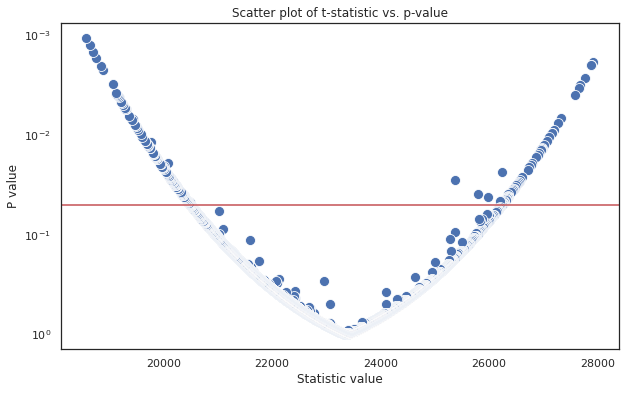

In [13]:
## Plotting

plt.figure(figsize=(8, 6), dpi=300) 
sns.set(style="white")  # Set the style
    
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x='Statistic value', y='P value', palette='tab10', s=100)
plt.yscale('log')
plt.gca().invert_yaxis()  # This line will reverse the y-axis
    
plt.title('Scatter plot of t-statistic vs. p-value')
#plt.grid(True, which="both", ls="--", c='0.65')
    
plt.axhline(y=0.05, color='r', linestyle='-')
#plt.legend()
plt.show()
           

In [14]:
results_df[results_df["P value"]<0.05]

,Label,Proportion,Test,Statistic value,P value
794,developmental programmed cell death (GO:0010623),0.954114,Mann-Whitney U,27920.5,0.001861
1562,negative regulation of cell junction assembly ...,1.132388,Mann-Whitney U,27888.0,0.002006
181,negative regulation of focal adhesion assembly...,1.132388,Mann-Whitney U,27888.0,0.002006
2322,negative regulation of adherens junction organ...,1.132388,Mann-Whitney U,27888.0,0.002006
1894,regulation of keratinocyte differentiation (GO...,0.958067,Mann-Whitney U,27762.5,0.002668
...,...,...,...,...,...
2303,cellular anion homeostasis (GO:0030002),0.584766,Mann-Whitney U,18845.0,0.002044
2283,response to peptidoglycan (GO:0032494),0.734697,Mann-Whitney U,18762.0,0.001687
507,embryonic heart tube development (GO:0035050),0.395099,Mann-Whitney U,18703.5,0.001470
2842,positive regulation of circadian rhythm (GO:00...,0.274337,Mann-Whitney U,18637.5,0.001254
